# 🍎 파이썬 머신러닝 완벽 가이드 

## Kaggle competition: TMDB Box Office Prediction

### 2019.04.13 ~ 2019.04.25

[캐글 TMDB Box Office Prediction](https://www.kaggle.com/c/tmdb-box-office-prediction/notebooks)

- 회귀 / RMSLE(평가방식)


### 데이터 전처리

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
movie_df = pd.read_csv('data/box_office_train.csv')
movie_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [4]:
movie_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

#### 필요없는 칼럼 삭제 

- id, imdb_id, original_language, original_title: 필요없는 칼럼
- spoken_languages(중복), status, tagline 삭제: 대체 가능하거나 object 데이터 삭제

In [5]:
movie_df.drop(['id','imdb_id','original_language',
              'original_title','spoken_languages','status',
              'tagline'],1, inplace=True)

In [6]:
movie_df.drop('title',1,inplace=True)

In [7]:
movie_df.drop('poster_path',1,inplace=True) # 중요하지 않은 컬럼

In [8]:
movie_df.drop('runtime',1,inplace=True )

In [9]:
# 과적합 요소가 있어 삭제
movie_df.drop('overview',1,inplace=True)

In [10]:
movie_df.head()

,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,release_date,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


#### belongs_to_collection

In [11]:
movie_df['belongs_to_collection'].isnull().sum() # 결측치 엄청 많음.

2396

In [12]:
movie_df['belongs_to_collection'] = movie_df['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [13]:
movie_df[movie_df['belongs_to_collection'] == 0]['belongs_to_collection'].count()

2396

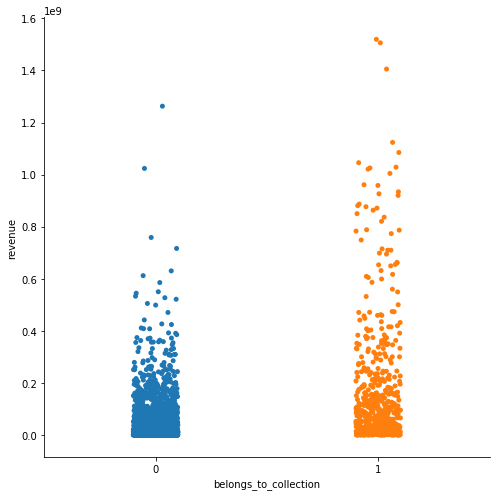

In [14]:
sns.catplot(x='belongs_to_collection', y='revenue', data=movie_df, height=7)
plt.show()

#### homepage

In [15]:
movie_df['homepage'].isnull().sum() # 결측치 엄청 많음.

2054

In [16]:
movie_df['homepage'] = movie_df['homepage'].apply(lambda x: 0 if pd.isnull(x) else 1)

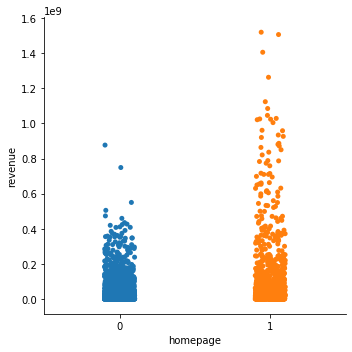

In [17]:
sns.catplot(x='homepage', y='revenue', data=movie_df)
plt.show()

홈페이지가 있냐 없냐도 영향을 미침. 

#### Keywords

In [18]:
for i, e in enumerate(movie_df['Keywords'][:5]):
    print(i,e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [19]:
keyword = {}
for i in movie_df['Keywords']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in keyword:
            keyword[eval(i)[0]['name']]=1
        else:
            keyword[eval(i)[0]['name']]+=1

In [20]:
keyword = pd.Series(keyword).sort_values(ascending=False)
keyword.head(10)

based on novel             56
independent film           42
prison                     41
new york                   40
paris                      37
sex                        34
london england             32
female nudity              29
suicide                    28
father son relationship    26
dtype: int64

In [21]:
movie_df['Keywords'].isnull().sum()

276

In [22]:
movie_df['Keywords'] = movie_df['Keywords'].fillna('')

In [23]:
def get_count(x): 
    list = x.split('},')
    return len(list)

In [24]:
movie_df['Keywords'] = movie_df['Keywords'].apply(lambda x: get_count(x))

In [25]:
movie_df['Keywords'].head()

0     4
1     4
2    12
3     7
4     1
Name: Keywords, dtype: int64

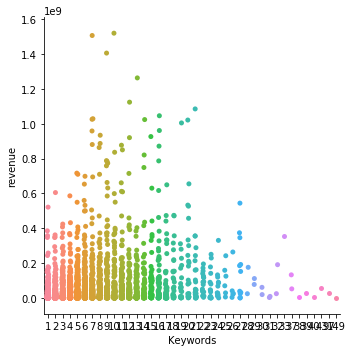

In [26]:
sns.catplot(x='Keywords', y='revenue', data=movie_df)
plt.show()

In [27]:
movie_df.loc[movie_df['Keywords'] == '', :]

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,release_date,Keywords,cast,crew,revenue


#### year와 month 살리기

In [28]:
movie_df.loc[movie_df['release_date'].isnull() == True, 'release_date']

Series([], Name: release_date, dtype: object)

In [29]:
def get_year(x):
    year = x.split('/')[2]
    if int(year) >= 19: 
        return int(year) + 1900
    else: 
        return int(year) + 2000
    
def get_month(x):
    month = x.split('/')[0]
    return int(month)

In [30]:
movie_df['year'] = movie_df['release_date'].apply(lambda x: get_year(x))

In [31]:
movie_df['year'].head(10)

0    2015
1    2004
2    2014
3    2012
4    2009
5    1987
6    2012
7    2004
8    1996
9    2003
Name: year, dtype: int64

In [32]:
movie_df['month'] = movie_df['release_date'].apply(lambda x: get_month(x))
movie_df['month'].head()

0     2
1     8
2    10
3     3
4     2
Name: month, dtype: int64

In [33]:
movie_df['year'].unique() # 오류난 것이 없음. 

array([2015, 2004, 2014, 2012, 2009, 1987, 1996, 2003, 1976, 1999, 2005,
       2002, 2010, 2013, 2011, 1998, 1982, 2006, 1992, 1997, 1986, 2007,
       2000, 1995, 1965, 1967, 2017, 1994, 2008, 1980, 1988, 2016, 1993,
       1956, 1989, 1962, 1990, 1981, 1984, 1979, 2001, 1966, 1978, 1968,
       1983, 1975, 1985, 1991, 1928, 1969, 1933, 1949, 1970, 1971, 1977,
       1940, 1954, 1957, 1953, 1932, 1960, 1948, 1958, 1961, 1959, 1952,
       1944, 1955, 1951, 1973, 1972, 1936, 1931, 1935, 1942, 1927, 1964,
       1939, 1925, 1950, 1945, 1943, 1974, 1921, 1963, 1938, 1947, 1930,
       1926, 1924])

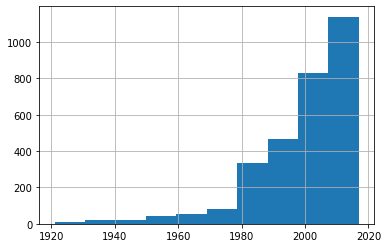

In [34]:
movie_df['year'].hist() # 시간이 지날수록 점점 더 증가함 

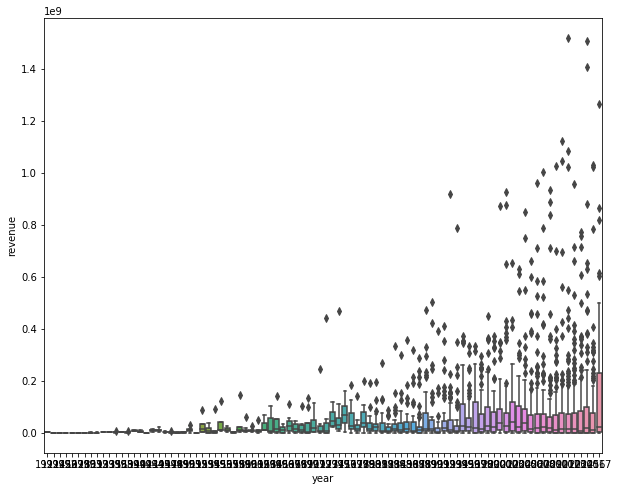

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(x=movie_df['year'], y=movie_df['revenue']) # year가 유의미한 컬럼인 것 맞음 - 이상치도 많군 

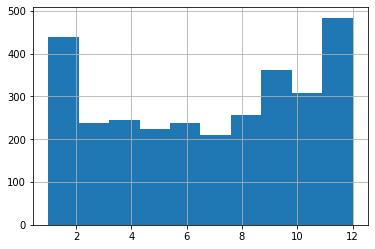

In [36]:
movie_df['month'].hist()

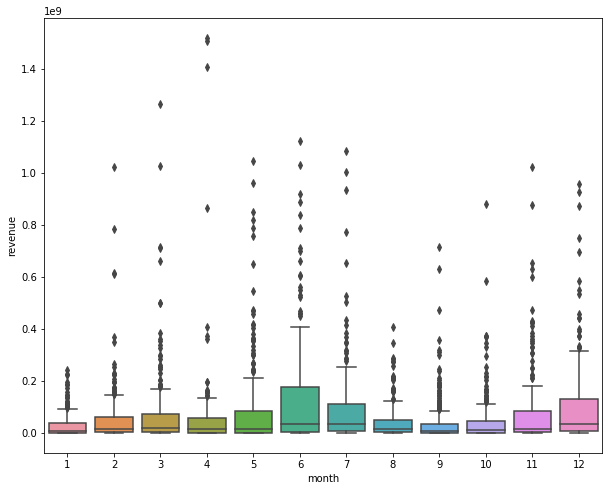

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x=movie_df['month'], y=movie_df['revenue']) # month도 유의미한 칼럼인듯 - 이상치가 근데 많군,,,

In [38]:
movie_df.drop('release_date',1, inplace=True)

그러나 year와 month는 카테고리형이므로 이를 카테고리식으로 바꾸어줘야 함.

#### crew 계산하기

In [40]:
movie_df.loc[movie_df['crew'].isnull() == True, 'crew'] 

470     NaN
518     NaN
680     NaN
906     NaN
934     NaN
1303    NaN
1617    NaN
1783    NaN
2014    NaN
2302    NaN
2384    NaN
2448    NaN
2518    NaN
2623    NaN
2883    NaN
2965    NaN
Name: crew, dtype: object

In [41]:
movie_df['crew'] = movie_df['crew'].fillna('')

In [42]:
movie_df['crew'].isnull().sum()

0

In [43]:
for i, e in enumerate(movie_df['crew'][:1]):
    print(i,e)
    print(type(e))

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [44]:
def get_count(x): 
    list = x.split('},')
    return len(list)

In [45]:
movie_df['crew count'] = movie_df['crew'].apply(lambda x: get_count(x))

In [46]:
movie_df['crew count'].isnull().sum()

0

In [47]:
movie_df['crew'].shape

(3000,)

In [48]:
movie_df.drop('crew',1, inplace=True)

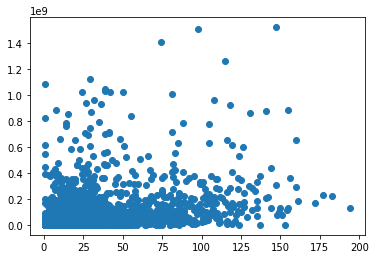

In [120]:
plt.scatter(movie_df['crew count'], movie_df['revenue'])
plt.show()

#### cast 

In [50]:
movie_df.loc[movie_df['cast'].isnull() == True, 'cast'] 

518     NaN
680     NaN
906     NaN
934     NaN
1303    NaN
1617    NaN
1783    NaN
2014    NaN
2448    NaN
2518    NaN
2623    NaN
2883    NaN
2965    NaN
Name: cast, dtype: object

In [51]:
movie_df['cast'] = movie_df['cast'].fillna('')

In [52]:
movie_df['cast'].isnull().sum()

0

In [53]:
movie_df['cast count'] = movie_df['cast'].apply(lambda x: get_count(x))

In [54]:
movie_df['cast count']

0       24
1       20
2       51
3        7
4        4
        ..
2995    15
2996    11
2997    15
2998    26
2999    34
Name: cast count, Length: 3000, dtype: int64

In [55]:
movie_df.drop('cast',1, inplace=True)

In [56]:
movie_df.head()

,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,Keywords,revenue,year,month,crew count,cast count
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",4,12314651,2015,2,72,24
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",4,95149435,2004,8,9,20
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",1,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",12,13092000,2014,10,64,51
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",7,16000000,2012,3,3,7
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",1,3923970,2009,2,2,4


#### genres

In [57]:
for i,e in enumerate(movie_df['genres'][:5]):
    print(i,e)
    print(type(e))

0 [{'id': 35, 'name': 'Comedy'}]
<class 'str'>
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
<class 'str'>
2 [{'id': 18, 'name': 'Drama'}]
<class 'str'>
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
<class 'str'>
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
<class 'str'>


In [58]:
genres = {}
for i in movie_df['genres']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in genres:
            genres[eval(i)[0]['name']]=1
        else:
            genres[eval(i)[0]['name']]+=1

In [59]:
genres = pd.Series(genres).sort_values(ascending=False)
genres

Drama              785
Comedy             604
Action             520
Adventure          187
Horror             170
Crime              147
Thriller           116
Animation           76
Documentary         71
Fantasy             68
Romance             67
Science Fiction     41
Family              36
Mystery             33
War                 20
Music               20
History             16
Western             13
Foreign              2
TV Movie             1
dtype: int64

드라마, 코메디, 액션 장르라면 더 수익을 많이 얻지 않을까? 그러나 revenue와 상관관계를 찾을 수 있는 코드를 어떻게 작성해야 할지 모르겠음 ㅜㅜ 그래서 일단 genres 제거.

In [60]:
movie_df.drop('genres',1, inplace=True)

#### production_companies

In [61]:
for i,e in enumerate(movie_df['production_companies'][:5]):
    print(i,e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [62]:
companies_dict = {}
for i in movie_df['production_companies']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in companies_dict:
            companies_dict[eval(i)[0]['name']]=1
        else:
            companies_dict[eval(i)[0]['name']]+=1

In [63]:
companies = pd.Series(companies_dict).sort_values(ascending=False)
companies.head(10)

Universal Pictures                        167
Paramount Pictures                        158
Twentieth Century Fox Film Corporation    122
Columbia Pictures                          90
Warner Bros.                               70
New Line Cinema                            69
Walt Disney Pictures                       62
TriStar Pictures                           44
Columbia Pictures Corporation              44
United Artists                             41
dtype: int64

상위 수에 있는 회사일수록 더 많은 수익을 얻을 가능성이 높을 것 같은데,, 이것만 따로 칼럼을 두는게 좋은 것인지 어떻게 해야 할지 잘 모르겠음. 

In [64]:
movie_df['production_companies'].isnull().sum()

156

In [65]:
movie_df['production_companies'] = movie_df['production_companies'].fillna('')

In [66]:
movie_df['companies count'] = movie_df['production_companies'].apply(lambda x: get_count(x))

In [67]:
movie_df['companies count'].head()

0    3
1    1
2    3
3    1
4    1
Name: companies count, dtype: int64

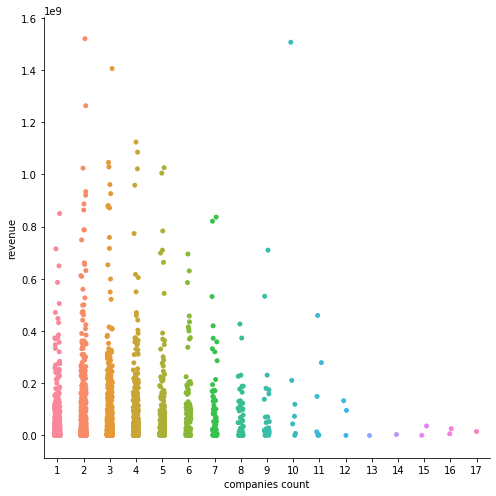

In [68]:
sns.catplot(x='companies count', y='revenue', data=movie_df, height=7)
plt.show()

주로 1-7개까지 수를 가진 영화들이 revenue를 더 많이 가지고 있는 것 같음. 

In [69]:
movie_df.drop('production_companies',1, inplace=True)

#### production_countries

In [70]:
for i,e in enumerate(movie_df['production_countries'][:10]):
    print(i,e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5 nan
6 [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
7 nan
8 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
9 [{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [71]:
countries_dict = {}
for i in movie_df['production_countries']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in countries_dict:
            countries_dict[eval(i)[0]['name']]=1
        else:
            countries_dict[eval(i)[0]['name']]+=1

In [72]:
countries = pd.Series(countries_dict).sort_values(ascending=False)
countries.head(10)

United States of America    1818
United Kingdom               234
France                       147
Canada                        97
Germany                       90
India                         78
Australia                     52
Japan                         50
Russia                        47
Italy                         36
dtype: int64

In [73]:
def get_country(x): 
    if (not(pd.isnull(x))):
        if (eval(x)[0]['name']) == 'United States of America':
            return 1
        elif (eval(x)[0]['name']) == 'United Kingdom':
            return 1
        else:
            return 0

In [74]:
movie_df['English country'] = movie_df['production_countries'].apply(lambda x: get_country(x))

In [75]:
movie_df[movie_df['English country'] == 1]['English country'].count()

2052

In [76]:
movie_df[movie_df['English country'] == 0]['English country'].count()

893

In [77]:
movie_df['English country'].isnull().sum()

55

In [78]:
movie_df['English country'] = movie_df['English country'].fillna(0)

In [79]:
movie_df['English country'].isnull().sum()

0

잘 변환 되었음. 

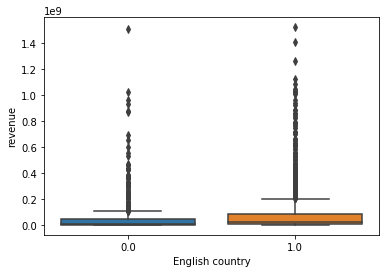

In [80]:
sns.boxplot(x=movie_df['English country'], y=movie_df['revenue'])

75% 선에서는 조금 차이가 있고, 물론 각자 이상치도 있기는 하지만, 그래도 영어권 국가들에서 아주 쬐끔 더 수익이 더 난다고 볼 수 있을 것 같음.

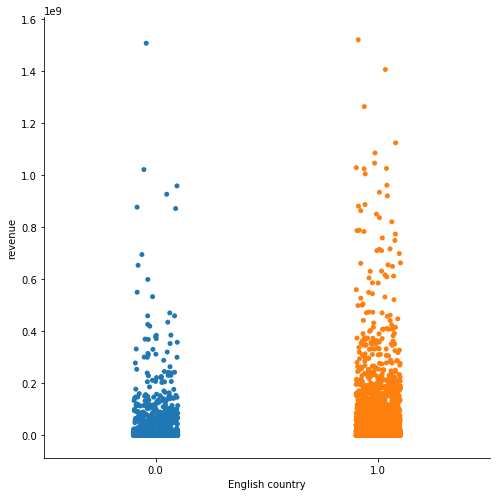

In [81]:
sns.catplot(x='English country', y='revenue', data=movie_df, height=7)
plt.show()

이 그래프로 보면 조금 더 영어권 국가의 작품이 수익이 더 난다고 볼 수 있을 것 같음.

In [82]:
movie_df.drop('production_countries',1, inplace=True)

#### budget

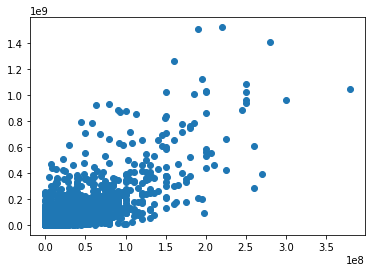

In [92]:
plt.scatter(movie_df['budget'], movie_df['revenue'])
plt.show()

양의 상관관계를 분명히 가지단 말이지. 그런데 상관계수가 이상하게 나오는 것을 보니까 내 생각에 문제는 이 값이 너무 크기 때문인 것 같음.

In [93]:
movie_df['budget'].unique()

array([ 14000000,  40000000,   3300000,   1200000,         0,   8000000,
         6000000,   1000000,  15000000,  53000000, 102000000,    500000,
        26000000,  32000000,  80000000,   4000000,  10000000,  11000000,
        45000000,  13000000,  90000000, 140000000,  30000000,  50000000,
         3800000,   3000000,  25000000,   3906840,  44000000,  38000000,
          560000,  12000000,  20000000, 125000000, 150000000,   5000000,
         1500000,   2000000,  85000000,  29000000,    445000,  17000000,
        10284523,  43000000,  28000000,   7500000,  35000000,   2500000,
        10500000,   7000000,  60000000,  10900000,  31000000,  72000000,
        75000000, 100000000,  93000000,  12716953,  18000000,   2400000,
        65000000,   9000000, 110000000,  14320000,   3500000,  39200000,
        63600000,    125000,  19000000,  12468389,  82500000,    259000,
       180000000,   4500000,  24000000,  12600000,  55000000,   3200000,
        22000000,   6700000,   2600000,  49000000, 

In [100]:
def minmaxscaler(x):
    scaler = (x - movie_df['budget'].min()) / (movie_df['budget'].max() - movie_df['budget'].min())
    return scaler

In [101]:
movie_df['budget'] = movie_df['budget'].apply(lambda x: minmaxscaler(x))

In [102]:
movie_df['budget'].head()

0    0.036842
1    0.105263
2    0.008684
3    0.003158
4    0.000000
Name: budget, dtype: float64

In [108]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
belongs_to_collection    3000 non-null int64
budget                   3000 non-null float64
homepage                 3000 non-null int64
popularity               3000 non-null float64
Keywords                 3000 non-null int64
revenue                  3000 non-null int64
year                     3000 non-null int64
month                    3000 non-null int64
crew count               3000 non-null int64
cast count               3000 non-null int64
companies count          3000 non-null int64
English country          3000 non-null float64
dtypes: float64(3), int64(9)
memory usage: 281.4 KB


### 인코딩과 로그변환

In [115]:
# 원-핫 인코딩 시켜주기 
movie_df_ohe = pd.get_dummies(movie_df)

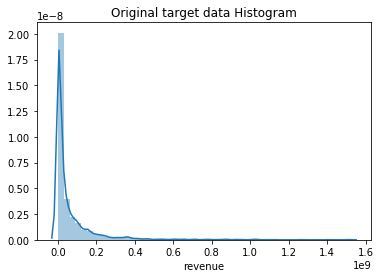

In [84]:
plt.title('Original target data Histogram')
sns.distplot(movie_df['revenue']) # 포아송 분포(?)니까 로그변환 시켜줘야겠군. 

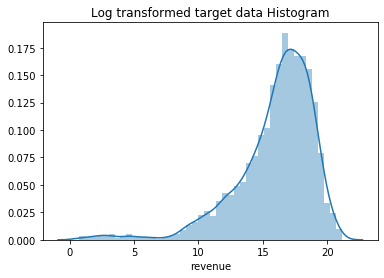

In [85]:
log_revenue = np.log1p(movie_df['revenue'])
plt.title('Log transformed target data Histogram')
sns.distplot(log_revenue) # 쏠리긴 했지만 그래도 나아졌음. 

### 평가 함수 만들기

In [116]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### 학습/예측 모델

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

X_features = movie_df_ohe.drop('revenue',1)
y_target = log_revenue

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                   test_size = 0.2, random_state=156)

In [118]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [rf_reg, lr_reg, ridge_reg, lasso_reg]

In [106]:
# 로그 변환 값에 rmse를 하면, rmsle로 평가됨! 
get_rmses(models)

RandomForestRegressor 로그 변환된 RMSE: 2.324
LinearRegression 로그 변환된 RMSE: 2.611
Ridge 로그 변환된 RMSE: 2.611
Lasso 로그 변환된 RMSE: 2.833


[2.3236174565704424, 2.6105697135352535, 2.611275039093147, 2.833003434751297]

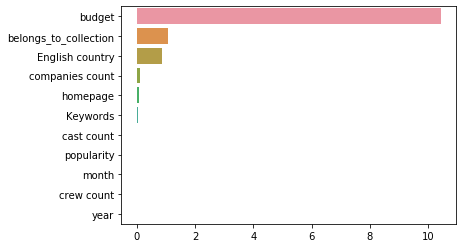

In [119]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)